In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import random
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('train.csv')
df.head()

,id,breath_id,R,C,time_step,u_in,u_out,pressure
0,1,1,20,50,0.000000,0.083334,0,5.837492
1,2,1,20,50,0.033652,18.383041,0,5.907794
2,3,1,20,50,0.067514,22.509278,0,7.876254
3,4,1,20,50,0.101542,22.808822,0,11.742872
4,5,1,20,50,0.135756,25.355850,0,12.234987


In [3]:
df['breath_id'].value_counts()

breath_id
1         80
83891     80
83924     80
83923     80
83922     80
          ..
41745     80
41743     80
41742     80
41741     80
125749    80
Name: count, Length: 75450, dtype: int64

In [10]:
len(df)

6036000

In [9]:
breath_idx = df['breath_id'].value_counts().index
breath_idx

Index([     1,  83891,  83924,  83923,  83922,  83917,  83915,  83913,  83911,
        83906,
       ...
        41755,  41750,  41740,  41749,  41748,  41745,  41743,  41742,  41741,
       125749],
      dtype='int64', name='breath_id', length=75450)

In [47]:
# Randomly sample 10% of the data
random.seed = 42
breath_idx_sample = random.choices(breath_idx, k= int(0.01 * len(breath_idx)))
breath_idx_sample

[96551,
 72,
 85976,
 69146,
 18266,
 83643,
 76467,
 93920,
 35236,
 111050,
 10887,
 106266,
 56385,
 26386,
 104269,
 110082,
 67519,
 62146,
 45253,
 43708,
 110541,
 48636,
 83143,
 119719,
 112734,
 2693,
 37644,
 89629,
 88842,
 6413,
 86922,
 64830,
 109840,
 86015,
 66310,
 26016,
 76506,
 14222,
 41550,
 5979,
 115832,
 86354,
 3386,
 15313,
 98087,
 35290,
 8129,
 116683,
 75946,
 114962,
 37192,
 115457,
 10442,
 94582,
 114507,
 64635,
 117670,
 31294,
 89182,
 85304,
 11350,
 30439,
 99207,
 116699,
 5273,
 12049,
 98163,
 53176,
 97472,
 63653,
 65303,
 73486,
 7448,
 125446,
 83276,
 60397,
 96834,
 101293,
 42039,
 69405,
 75463,
 43766,
 2863,
 42173,
 4060,
 71023,
 73293,
 68384,
 80236,
 12192,
 52988,
 62500,
 77481,
 47870,
 25909,
 121830,
 93029,
 80912,
 58256,
 27794,
 120689,
 108612,
 62330,
 98628,
 9343,
 91986,
 39662,
 36227,
 20746,
 82991,
 85312,
 45382,
 16234,
 18758,
 36287,
 22971,
 122750,
 100059,
 88944,
 100803,
 69681,
 84224,
 123646,
 3161

In [48]:
df_sample = df[df['breath_id'].isin(breath_idx_sample)]
df_sample.head()

,id,breath_id,R,C,time_step,u_in,u_out,pressure
880,881,14,5,50,0.000000,68.808278,0,6.259305
881,882,14,5,50,0.034023,58.656985,0,8.579275
882,883,14,5,50,0.068202,53.890455,0,9.774412
883,884,14,5,50,0.102030,52.488426,0,10.266527
884,885,14,5,50,0.136237,50.966693,0,10.758642


In [49]:
def plot_breath(num_samples):
    breath_length = len(df[df['breath_id'] == 1])
    for i in range(num_samples):
        plt.plot(list(range(breath_length)), df[df['breath_id'] == i + 1]['pressure'])

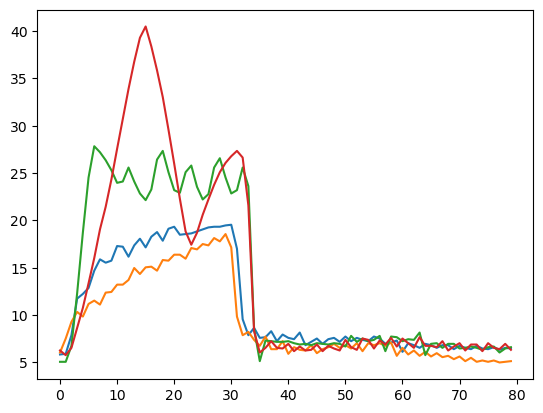

In [50]:
plot_breath(4)

In [51]:
X = df_sample.drop('pressure', axis=1)
y = df_sample['pressure']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### Decision Tree

In [52]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error

In [55]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), ['C', 'R'])
    ],
    remainder=StandardScaler()
)

dt_pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', DecisionTreeRegressor())
])

param_grid = {
    'regressor__max_depth': [None, 5, 10],
    'regressor__min_samples_split':[2, 5, 10],
    'regressor__min_samples_leaf':[1, 2, 4]
}

In [56]:
dt_grid = GridSearchCV(dt_pipe, param_grid=param_grid, scoring='neg_mean_squared_error', verbose=1)
dt_grid.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder=StandardScaler(),
                                                          transformers=[('cat',
                                                                         OneHotEncoder(),
                                                                         ['C',
                                                                          'R'])])),
                                       ('regressor', DecisionTreeRegressor())]),
             param_grid={'regressor__max_depth': [None, 5, 10],
                         'regressor__min_samples_leaf': [1, 2, 4],
                         'regressor__min_samples_split': [2, 5, 10]},
             scoring='neg_mean_squared_error', verbose=1)

In [57]:
dt_grid.best_params_

{'regressor__max_depth': None,
 'regressor__min_samples_leaf': 4,
 'regressor__min_samples_split': 10}

In [58]:
y_pred = dt_grid.predict(X_train)
mae_train = mean_absolute_error(y_train, y_pred)
print(f"Mean absolute error training: {mae_train}")

Mean absolute error training: 0.9185639597281802


In [59]:
y_pred_test = dt_grid.predict(X_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
print(f"Mean absolute error test: {mae_test}")

Mean absolute error test: 1.6078056663630385


In [61]:
# Let check the performance on the actual test case
df_test = pd.read_csv('test.csv')
y_test_data_pred = dt_grid.predict(df_test)
res = pd.DataFrame({'id': df_test['id'], 'pressure': y_test_data_pred}, index=None)
res.to_csv('output_dt.csv', index=False)

### Support Vector Machine Regressor

In [62]:
from sklearn.svm import SVR

In [64]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), ['C', 'R'])
    ],
    remainder=StandardScaler()
)

# Define the pipeline with preprocessing and model
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', SVR())
])

# Define hyperparameters to search
param_grid = {
    'regressor__kernel': ['linear', 'poly', 'rbf'],
    'regressor__C': [0.1, 1, 10],
    # 'regressor__gamma': ['scale', 'auto'],
    # 'regressor__epsilon': [0.1, 0.2, 0.5]
}

# Grid search with cross-validation
svr_grid_search = GridSearchCV(pipeline, param_grid, scoring='neg_mean_squared_error', verbose=1)

# Fit the model
svr_grid_search.fit(X_train, y_train)

# Best parameters and best score
# print("Best parameters found: ", grid_search.best_params_)
# print("Best negative mean squared error found: ", grid_search.best_score_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder=StandardScaler(),
                                                          transformers=[('cat',
                                                                         OneHotEncoder(),
                                                                         ['C',
                                                                          'R'])])),
                                       ('regressor', SVR())]),
             param_grid={'regressor__C': [0.1, 1, 10],
                         'regressor__kernel': ['linear', 'poly', 'rbf']},
             scoring='neg_mean_squared_error', verbose=1)

In [66]:
# Best parameters and best score
print("Best parameters found: ", svr_grid_search.best_params_)
print("Best negative mean squared error found: ", svr_grid_search.best_score_)

Best parameters found:  {'regressor__C': 10, 'regressor__kernel': 'rbf'}
Best negative mean squared error found:  -25.477416431961974


In [67]:
y_test_data_pred_svr = svr_grid_search.predict(df_test)
res = pd.DataFrame({'id': df_test['id'], 'pressure': y_test_data_pred_svr}, index=None)
res.to_csv('output_svr.csv', index=False)

### Random Forest

In [68]:
from sklearn.ensemble import RandomForestRegressor

In [69]:
# Initialize the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model
rf_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_regressor.predict(X_test)

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 1.3637494753218353


### Polynomial Regression

In [70]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [71]:
# Initialize PolynomialFeatures to create polynomial features of degree 3
poly = PolynomialFeatures(degree=3)

# Transform the features to polynomial features
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Initialize a Linear Regression model
linear_reg = LinearRegression()

# Fit the model
linear_reg.fit(X_train_poly, y_train)

# Make predictions on the test set
y_pred = linear_reg.predict(X_test_poly)

# Calculate Mean Squared Error
mse = mean_absolute_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 6.8920266551691896


### KNN

In [72]:
from sklearn.neighbors import KNeighborsRegressor

In [76]:
def KNN(neighbors):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Initialize KNeighborsRegressor with the number of neighbors you want
    knn_regressor = KNeighborsRegressor(n_neighbors=neighbors)

    # Fit the model
    knn_regressor.fit(X_train_scaled, y_train)

    # Make predictions on the test set
    y_pred = knn_regressor.predict(X_test_scaled)

    # Calculate Mean Absolute Error
    mae = mean_absolute_error(y_test, y_pred)
    print(f"Mean Absolute Error for {neighbors} neighbors: {mae}")

In [79]:
for i in [1, 2, 3, 4, 5, 8, 15]:
    KNN(i)

Mean Absolute Error for 1 neighbors: 1.7185364136118735
Mean Absolute Error for 2 neighbors: 1.6616932441423464
Mean Absolute Error for 3 neighbors: 1.7376674590517935
Mean Absolute Error for 4 neighbors: 1.8064690921109166
Mean Absolute Error for 5 neighbors: 1.8779977806523787
Mean Absolute Error for 8 neighbors: 2.032951291748539
Mean Absolute Error for 15 neighbors: 2.2389036579190704
